In [253]:
import pandas as pd
import numpy as np
from audioset_tagging_cnn.config import labels
import datetime
from matplotlib import pyplot as plt 

Read dataframe

In [152]:
Df = pd.read_pickle('test.xz')

Remove this cell if the next version is run 

In [153]:
alldatetimes = [datetime.datetime(cdate.year,cdate.month,cdate.day,ctime.hour,ctime.minute,ctime.second) for ctime,cdate in zip(Df.time,Df.date)]

Df['datetime'] = alldatetimes

Df = Df.sort_values(by='datetime')

Gather the probas and find the categories for which the maximum through the night is more than a certain probab threshold

In [156]:
allprobas = np.stack(Df['probas'])

In [158]:
def keep_array_thresh(probasarray,threshold=0.1):
    array_max = np.max(probasarray,axis=0)
    ind_max = np.argwhere(array_max>threshold)

    return ind_max

In [251]:
ind_labels =keep_array_thresh(allprobas,threshold = 0.1)
kept_labels = [labels[int(i)] for i in ind_labels]

In [252]:
kept_labels

['Speech',
 'Animal',
 'Domestic animals, pets',
 'Dog',
 'Cat',
 'Meow',
 'Fowl',
 'Bird',
 'Bird vocalization, bird call, bird song',
 'Chirp, tweet',
 'Insect',
 'Music',
 'Gong',
 'Wind',
 'Wind noise (microphone)',
 'Thunderstorm',
 'Thunder',
 'Rain',
 'Ocean',
 'Waves, surf',
 'Vehicle',
 'Boat, Water vehicle',
 'Car',
 'Traffic noise, roadway noise',
 'Rail transport',
 'Train',
 'Railroad car, train wagon',
 'Aircraft',
 'Fixed-wing aircraft, airplane',
 'Environmental noise',
 'Pink noise',
 'Field recording']

Now manually filter this list to visualize only a few of them 

In [304]:
subset = [0,3,4,7,11,13,20,22]
print([kept_labels[categ] for categ in subset])

['Speech', 'Dog', 'Cat', 'Bird', 'Music', 'Wind', 'Vehicle', 'Car']


In [305]:
ind_labels_final = [ind_labels[categ] for categ in subset]
kept_labels_final = [kept_labels[categ] for categ in subset]

In [306]:
allprobas_kept = allprobas[:,ind_labels_final].squeeze()

In [307]:
skiptime = 12

timelabels = [''] * len(Df.datetime)

origtimes = list(Df.datetime)

for i in np.arange(0,len(origtimes),skiptime):
    timelabels[i] = origtimes[i]
    

<Figure size 1440x720 with 0 Axes>

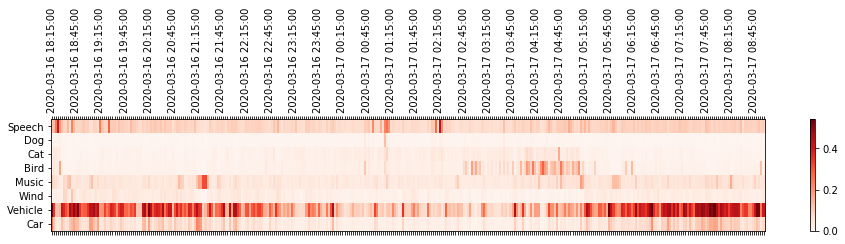

In [317]:
plt.figure(figsize=(20,10))
plt.matshow(allprobas_kept.T,vmin=0,aspect='auto',cmap=plt.cm.Reds)
plt.yticks(ticks = range(len(kept_labels_final)),labels=kept_labels_final)
plt.xticks(ticks = range(len(timelabels)),labels = timelabels,rotation=90)
plt.colorbar()
plt.savefig('silentcity.png',dpi=300,bbox_inches='tight')